# <span style = "color:crimson;font-size:30px;font-family:sans-serif;"><b>Table of contents</b></span>
*   <span style="font-size:20px;"><a href="#section-1"><b>1. Data Understanding</b></a></span>
    *  <span style="font-size:16px;"><a href="#section-1-1">1.1 Data Acquisition</a></span>
    *  <span style="font-size:16px;"><a href="#section-1-2">1.2 Data Assessment</a></span>
*   <span style="font-size:20px;"><a href="#section-2"><b>2. Data Preparation</b></a></span>
    *  <span style="font-size:16px;"><a href="#section-2-1">2.1 Data Cleansing</a></span>
    *  <span style="font-size:16px;"><a href="#section-2-2">2.2 Feature Engineering</a></span>
    *  <span style="font-size:16px;"><a href="#section-2-3">2.3 Exploratory Data Analysis (EDA)</a></span>
        *  <span style="font-size:14px;"><a href="#section-2-3-1">2.3.1 Numerical Feature Exploration</a></span>
        *  <span style="font-size:14px;"><a href="#section-2-3-2">2.3.2 Categorical Feature Exploration</a></span>
    *  <span style="font-size:16px;"><a href="#section-2-4">2.4 Feature Selection</a></span>
*   <span style="font-size:20px;"><a href="#section-3"><b>3. Model Building and Evaluation</b></a></span>
    *  <span style="font-size:16px;"><a href="#section-3-1">3.1 Logistic Regression</a></span>
        *  <span style="font-size:14px;"><a href="#section-3-1-1">3.1.1 Logistic Regression Tuning</a></span>
    *  <span style="font-size:16px;"><a href="#section-3-2">3.2 KNN</a></span>
        *  <span style="font-size:14px;"><a href="#section-3-2-1">3.2.1 KNN Tuning</a></span> 
    *  <span style="font-size:16px;"><a href="#section-3-3">3.3 Decision Trees</a></span>
        *  <span style="font-size:14px;"><a href="#section-3-3-1">3.3.1 Decision Trees Tuning</a></span> 
    *  <span style="font-size:16px;"><a href="#section-3-4">3.4 Bagging</a></span>
        *  <span style="font-size:14px;"><a href="#section-3-4-1">3.4.1 Bagging Tuning</a></span> 
    *  <span style="font-size:16px;"><a href="#section-3-5">3.5 Boosting</a></span>
        *  <span style="font-size:14px;"><a href="#section-3-5-1">3.5.1 Bagging Tuning</a></span> 
*   <span style="font-size:20px;"><a href="#section-4"><b>4. Model Deployment</b></a></span>


 






<span style="color:#FFBF50; font-size:25px; font-family:sans-serif;"><a id="section-1"> </a> 1. Data Understanding </span>

<span style="color:black; font-size:18px; font-family:sans-serif;"><a id="section-1-1"> </a><b> 1.1 Data Acquisition </b></span>

In [242]:
# Importing necessary libraries
## Importing libraries to manipulate tabular data
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

## Importing libraries to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

## Importing regex library to manipulate textual features
import re

## Importing gender_guesser library to detect the gender of the publisher from its name
import gender_guesser.detector as gender

## Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Feature selection
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor 
## Data splitting
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

## Algorithms
import statsmodels.api as sm
from scipy.stats import norm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

## Evaluation
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score, recall_score, make_scorer

## Model Deployment
from flask import Flask, request, jsonify, render_template
import pickle
import os

In [2]:
# Reading the data
df_1 = pd.read_csv('Indiegogo_1.csv')
df_2 = pd.read_csv('Indiegogo_2.csv')
df_3 = pd.read_csv('Indiegogo_3.csv')

display(df_1.head(), df_2.head(), df_3.head())
display(df_1.shape, df_2.shape, df_3.shape)

,bullet_point,category,category_url,clickthrough_url,close_date,currency,funds_raised_amount,funds_raised_percent,image_url,is_indemand,is_pre_launch,is_proven,offered_by,open_date,perk_goal_percentage,perks_claimed,price_offered,price_retail,product_stage,project_id,project_type,source_url,tagline,tags,title
0,NaN,Wellness,/explore/wellness,/projects/unakti-soil-to-skin,2022-02-26T23:59:59-08:00,EUR,5677,0.153432,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2022-01-27T00:00:00-08:00,NaN,NaN,NaN,NaN,NaN,2728680,campaign,https://www.indiegogo.com/explore/all?project_...,"""leading the eco-luxury cosmetic revolution wh...","[""beauty"",""community"",""female founders"",""socia...",UNAKTI: soil to skin
1,NaN,Wellness,/explore/wellness,/projects/cows-4-kids,2021-05-22T23:59:59-07:00,USD,26694,2.403800,https://c1.iggcdn.com/indiegogo-media-prod-cld...,True,False,False,NaN,2021-03-23T00:00:00-07:00,NaN,NaN,NaN,NaN,NaN,2667683,campaign,https://www.indiegogo.com/explore/all?project_...,Help Preserve the Fountain of Unlimited Health...,"[""food"",""community""]",Cows 4 Kids
2,NaN,Wellness,/explore/wellness,/projects/fundraiser-for-fossella-family,2022-03-08T23:59:59-08:00,CAD,355,0.355000,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2022-02-06T00:00:00-08:00,NaN,NaN,NaN,NaN,NaN,2733630,campaign,https://www.indiegogo.com/explore/all?project_...,Support Fossella family after the loss of thei...,"[""community""]",Fundraiser for Fossella Family
3,NaN,Wellness,/explore/wellness,/projects/denis-ouch-central-america-bike-food...,2022-03-22T23:59:59-07:00,USD,575,0.230000,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2022-01-31T00:00:00-08:00,NaN,NaN,NaN,NaN,NaN,2729845,campaign,https://www.indiegogo.com/explore/all?project_...,Overconsumption in Developed Countries vs Insu...,"[""food""]",Denis OUCH: Central America Bike Food Trip
4,NaN,Wellness,/explore/wellness,/projects/united-states-happiness-report,2022-03-20T23:59:59-07:00,USD,1425,0.285000,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2022-01-21T00:00:00-08:00,NaN,NaN,NaN,NaN,NaN,2704590,campaign,https://www.indiegogo.com/explore/all?project_...,Help Gross National Happiness USA conduct the ...,"[""social innovations""]",United States Happiness Report


,bullet_point,category,category_url,clickthrough_url,close_date,currency,funds_raised_amount,funds_raised_percent,image_url,is_indemand,is_pre_launch,is_proven,offered_by,open_date,perk_goal_percentage,perks_claimed,price_offered,price_retail,product_stage,project_id,project_type,source_url,tagline,tags,title
0,NaN,Animal Rights,/explore/animal-rights,/projects/save-the-pouch,2015-07-30T23:59:59-07:00,USD,320,0.006400,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2015-05-31T17:26:03-07:00,NaN,NaN,NaN,NaN,NaN,1175927,campaign,https://www.indiegogo.com/explore/all?project_...,Act now to help save our marsupial mates from ...,"[""other""]",Save the Pouch
1,NaN,Animal Rights,/explore/animal-rights,/projects/kikongo-otter-sanctuary,2015-04-26T23:59:59-07:00,USD,2020,1.000000,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2015-02-25T05:43:09-08:00,NaN,NaN,NaN,NaN,NaN,1153444,campaign,https://www.indiegogo.com/explore/all?project_...,Help Delphin and Sico from Kikongo Otter Sanct...,"[""other""]",Kikongo Otter Sanctuary
2,NaN,Animal Rights,/explore/animal-rights,/projects/fleahex-all-natural-flea-control-for...,2015-09-13T23:59:59-07:00,USD,24743,0.247430,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2015-07-15T05:34:47-07:00,NaN,NaN,NaN,NaN,NaN,1190589,campaign,https://www.indiegogo.com/explore/all?project_...,Guaranteed delivery and results!,"[""other""]",FleaHex - All Natural Flea Control for Dogs
3,NaN,Animal Rights,/explore/animal-rights,/projects/fearless-dog-training-system,2016-02-29T23:59:59-08:00,USD,1723,0.229733,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2016-01-25T09:12:05-08:00,NaN,NaN,NaN,NaN,NaN,1200901,campaign,https://www.indiegogo.com/explore/all?project_...,"Dog training made simple using our unique, com...","[""dogs"",""dogs""]",FearLess Dog Training System
4,NaN,Animal Rights,/explore/animal-rights,/projects/fund-new-deer-attraction-at-wildlife...,2015-05-28T23:59:59-07:00,USD,325,0.040625,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2015-04-28T07:26:21-07:00,NaN,NaN,NaN,NaN,NaN,1236996,campaign,https://www.indiegogo.com/explore/all?project_...,Help Wildlife Prairie Park add a new attractio...,"[""jazz""]",Fund New Deer Attraction at Wildlife Prairie P...


,bullet_point,category,category_url,clickthrough_url,close_date,currency,funds_raised_amount,funds_raised_percent,image_url,is_indemand,is_pre_launch,is_proven,offered_by,open_date,perk_goal_percentage,perks_claimed,price_offered,price_retail,product_stage,project_id,project_type,source_url,tagline,tags,title
0,NaN,Comics,/explore/comics,/projects/ponyo-porco,2016-08-27T23:59:59-07:00,USD,253,0.028111,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2016-07-13T07:25:29-07:00,NaN,NaN,NaN,NaN,NaN,1801644,campaign,https://www.indiegogo.com/explore/all?project_...,The magical world with hand-painted prints.,"[""design"",""clothing""]",PONYO PORCO
1,NaN,Comics,/explore/comics,/projects/kitsune-to-neko-the-fox-and-the-cat,2016-12-16T23:59:59-08:00,EUR,1286,0.643000,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2016-10-17T13:55:39-07:00,NaN,NaN,NaN,NaN,NaN,1906027,campaign,https://www.indiegogo.com/explore/all?project_...,"Un fumetto dalle atmosfere giapponesi antiche,...","[""other""]",Kitsune to Neko - The Fox and the Cat
2,NaN,Comics,/explore/comics,/projects/lawrence-lindell-in-print,2018-06-27T23:59:59-07:00,USD,497,0.024850,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2018-04-28T16:17:12-07:00,NaN,NaN,NaN,NaN,NaN,2338145,campaign,https://www.indiegogo.com/explore/all?project_...,I have self published 4 books. Help me reprint...,"[""other""]",Lawrence Lindell in Print
3,NaN,Comics,/explore/comics,/projects/the-oswald-chronicles-passing-queens...,2020-04-30T23:59:59-07:00,USD,250,0.500000,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2020-04-09T00:00:00-07:00,NaN,NaN,NaN,NaN,NaN,2577990,campaign,https://www.indiegogo.com/explore/all?project_...,Discover how a mouse (Oswald) becomes the grea...,"[""adventure"",""books"",""fantasy"",""mouse""]","The Oswald Chronicles, Passing Queens #1-6"
4,NaN,Comics,/explore/comics,/projects/derelicts-deutsche-ausgabe-von-dead-...,2020-04-09T23:59:59-07:00,EUR,487,0.695714,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2020-03-15T00:00:00-07:00,NaN,NaN,NaN,NaN,NaN,2577592,campaign,https://www.indiegogo.com/explore/all?project_...,DERELICTS erzählt die Geschichte von drei Söld...,"[""books"",""thriller""]",DERELICTS - deutsche Ausgabe von DEAD DIVER


(32345, 25)

(32225, 25)

(32452, 25)

In [3]:
# Merging two dataframe into one dataframe
df_full = pd.concat([df_1, df_2, df_3], ignore_index = True)
df_full.reset_index(inplace=True)

In [4]:
display(df_full.head(), df_full.shape)

,index,bullet_point,category,category_url,clickthrough_url,close_date,currency,funds_raised_amount,funds_raised_percent,image_url,is_indemand,is_pre_launch,is_proven,offered_by,open_date,perk_goal_percentage,perks_claimed,price_offered,price_retail,product_stage,project_id,project_type,source_url,tagline,tags,title
0,0,NaN,Wellness,/explore/wellness,/projects/unakti-soil-to-skin,2022-02-26T23:59:59-08:00,EUR,5677,0.153432,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2022-01-27T00:00:00-08:00,NaN,NaN,NaN,NaN,NaN,2728680,campaign,https://www.indiegogo.com/explore/all?project_...,"""leading the eco-luxury cosmetic revolution wh...","[""beauty"",""community"",""female founders"",""socia...",UNAKTI: soil to skin
1,1,NaN,Wellness,/explore/wellness,/projects/cows-4-kids,2021-05-22T23:59:59-07:00,USD,26694,2.403800,https://c1.iggcdn.com/indiegogo-media-prod-cld...,True,False,False,NaN,2021-03-23T00:00:00-07:00,NaN,NaN,NaN,NaN,NaN,2667683,campaign,https://www.indiegogo.com/explore/all?project_...,Help Preserve the Fountain of Unlimited Health...,"[""food"",""community""]",Cows 4 Kids
2,2,NaN,Wellness,/explore/wellness,/projects/fundraiser-for-fossella-family,2022-03-08T23:59:59-08:00,CAD,355,0.355000,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2022-02-06T00:00:00-08:00,NaN,NaN,NaN,NaN,NaN,2733630,campaign,https://www.indiegogo.com/explore/all?project_...,Support Fossella family after the loss of thei...,"[""community""]",Fundraiser for Fossella Family
3,3,NaN,Wellness,/explore/wellness,/projects/denis-ouch-central-america-bike-food...,2022-03-22T23:59:59-07:00,USD,575,0.230000,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2022-01-31T00:00:00-08:00,NaN,NaN,NaN,NaN,NaN,2729845,campaign,https://www.indiegogo.com/explore/all?project_...,Overconsumption in Developed Countries vs Insu...,"[""food""]",Denis OUCH: Central America Bike Food Trip
4,4,NaN,Wellness,/explore/wellness,/projects/united-states-happiness-report,2022-03-20T23:59:59-07:00,USD,1425,0.285000,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2022-01-21T00:00:00-08:00,NaN,NaN,NaN,NaN,NaN,2704590,campaign,https://www.indiegogo.com/explore/all?project_...,Help Gross National Happiness USA conduct the ...,"[""social innovations""]",United States Happiness Report


(97022, 26)

In [5]:
# Concating the url columns to scrape the project website
df_full['full_url'] = df_full['source_url'].str[:25] + df_full['clickthrough_url']

display(df_full['full_url'].head())

0    https://www.indiegogo.com/projects/unakti-soil...
1       https://www.indiegogo.com/projects/cows-4-kids
2    https://www.indiegogo.com/projects/fundraiser-...
3    https://www.indiegogo.com/projects/denis-ouch-...
4    https://www.indiegogo.com/projects/united-stat...
Name: full_url, dtype: object

<h3 style="color: red"> Note </h3>

<b>The below code chunck takes a long time to finsih so it is commented out</b>

In [6]:
# import selenium
# from selenium.webdriver.common.by import By
# from selenium.webdriver.chrome.service import Service
# from selenium.webdriver.chrome.options import Options
# from selenium import webdriver, common
# from selenium.common.exceptions import WebDriverException
# from selenium.common.exceptions import NoSuchElementException


# options = Options()
# options.headless = True
# service = Service("/path/to/chromedriver")
# driver = selenium.webdriver.Chrome(options=options)


# def extract_webpage_data(link):
#     try:
#         driver = webdriver.Chrome()
#         driver.get(link)
#         driver.implicitly_wait(10)

#         country_element = driver.find_element(By.CSS_SELECTOR, "div[data-v-7f7ca13d][class='basicsCampaignOwner-details-city']")
#         country = country_element.text

#         publisher_element = driver.find_element(By.CSS_SELECTOR, "div[data-v-7f7ca13d][data-v-1f412c60][class='desktop campaignOwnerName-tooltip t-body--sansSerif--lg']")
#         publisher = publisher_element.text

#         goal_element = driver.find_element(By.CSS_SELECTOR, "span[data-v-1f412c60][data-v-3acff91c][class='tooltipHover t-body--sansSerif t-transform--default basicsGoalProgress-progressDetails-detailsGoal-goalPopover']")
#         goal_type = goal_element.text

#         backer_element = driver.find_element(By.CSS_SELECTOR, "span[data-v-3acff91c][class='t-weight--medium']")
#         backer = backer_element.text
#         update_element = driver.find_element(By.CSS_SELECTOR, "span[data-v-ecdd0d02][class='tabHeadersWithPill-tab-pill t-label--sm']")
#         update=update_element.text
#         campaign_element = driver.find_element(By.CSS_SELECTOR, "div[data-v-7f7ca13d][class='basicsCampaignOwner-details-count']")
#         campaign = campaign_element.text


#         data = {
#             "country": country,
#             "publisher": publisher,
#             "goal_type": goal_type,
#             "backer": backer
#         }

#         driver.quit()
#         return data

#     except NoSuchElementException:
#         return None

# def process_webpage_links(webpage_links, countries, publishers, goal_types, backers):
#     for link in webpage_links:
#         data = extract_webpage_data(link)
#         if data:
#             countries.append(data["country"])
#             publishers.append(data["publisher"])
#             goal_types.append(data["goal_type"])
#             backers.append(data["backer"])
#             updates.append(update)
#             campaigns.append(campaign)
#         else:
#             countries.append("None")
#             publishers.append("None")
#             goal_types.append("None")
#             backers.append("None")
#             updates.append("None")
#             campaigns.append("None")

# def main():
#     # Define the list of webpage links
#     webpage_links = df_full['full_url']

#     # Initialize empty lists for storing extracted data
#     countries = []
#     publishers = []
#     goal_types = []
#     backers = []
#     updates = []
#     campaigns = []
#     # Process each chunk of webpage links
#     process_webpage_links(webpage_links[0:5000], countries, publishers, goal_types, backers)
#     process_webpage_links(webpage_links[5000:10000], countries, publishers, goal_types, backers)
#     process_webpage_links(webpage_links[10000:15000], countries, publishers, goal_types, backers)
#     process_webpage_links(webpage_links[15000:20000], countries, publishers, goal_types, backers)
#     process_webpage_links(webpage_links[20000:25000], countries, publishers, goal_types, backers)
#     process_webpage_links(webpage_links[25000:30000], countries, publishers, goal_types, backers)
#     process_webpage_links(webpage_links[30000:35000], countries, publishers, goal_types, backers)
#     process_webpage_links(webpage_links[35000:40000], countries, publishers, goal_types, backers)
#     process_webpage_links(webpage_links[40000:45000], countries, publishers, goal_types, backers)
#     process_webpage_links(webpage_links[45000:50000], countries, publishers, goal_types, backers)
#     process_webpage_links(webpage_links[50000:55000], countries, publishers, goal_types, backers)
#     process_webpage_links(webpage_links[55000:60000], countries, publishers, goal_types, backers)
#     process_webpage_links(webpage_links[60000:], countries, publishers, goal_types, backers)
#     # Add more processing calls for remaining chunks of webpage links
#     data = {"country": countries, 
#             "publisher": publishers, 
#             "goal_type": goal_types, 
#             "backer": backers, 
#             "updates": updates,
#             "campaigns": campaigns}
#     df_links = pd.DataFrame(data)

#     # Export the DataFrame to a CSV file
#     df_links.to_csv("extracted.csv", index=False)

# if __name__ == "__main__":
#     main()

In [7]:
# Reading the scrpaed columns
extracted = pd.read_csv('extracted.csv')
# Merging both the original and scraped dataframes
df_full = pd.merge(df_full, extracted, how='inner', on ='index')

display(df_full.head(), df_full.shape)

,index,bullet_point,category,category_url,clickthrough_url,close_date,currency,funds_raised_amount,funds_raised_percent,image_url,is_indemand,is_pre_launch,is_proven,offered_by,open_date,perk_goal_percentage,perks_claimed,price_offered,price_retail,product_stage,project_id,project_type,source_url,tagline,tags,title,full_url,Country,Publisher,Goal_Type,Backers,Updates,Campaigns
0,0,NaN,Wellness,/explore/wellness,/projects/unakti-soil-to-skin,2022-02-26T23:59:59-08:00,EUR,5677,0.153432,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2022-01-27T00:00:00-08:00,NaN,NaN,NaN,NaN,NaN,2728680,campaign,https://www.indiegogo.com/explore/all?project_...,"""leading the eco-luxury cosmetic revolution wh...","[""beauty"",""community"",""female founders"",""socia...",UNAKTI: soil to skin,https://www.indiegogo.com/projects/unakti-soil...,"La Coruña, Spain",Susana Gago Garcia,Flexible Goal,52,4,1 Campaign |
1,1,NaN,Wellness,/explore/wellness,/projects/cows-4-kids,2021-05-22T23:59:59-07:00,USD,26694,2.403800,https://c1.iggcdn.com/indiegogo-media-prod-cld...,True,False,False,NaN,2021-03-23T00:00:00-07:00,NaN,NaN,NaN,NaN,NaN,2667683,campaign,https://www.indiegogo.com/explore/all?project_...,Help Preserve the Fountain of Unlimited Health...,"[""food"",""community""]",Cows 4 Kids,https://www.indiegogo.com/projects/cows-4-kids,None,None,None,None,None,None
2,2,NaN,Wellness,/explore/wellness,/projects/fundraiser-for-fossella-family,2022-03-08T23:59:59-08:00,CAD,355,0.355000,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2022-02-06T00:00:00-08:00,NaN,NaN,NaN,NaN,NaN,2733630,campaign,https://www.indiegogo.com/explore/all?project_...,Support Fossella family after the loss of thei...,"[""community""]",Fundraiser for Fossella Family,https://www.indiegogo.com/projects/fundraiser-...,"Toronto, Canada",Doris Rajan,Flexible Goal,17,0,3 Campaigns |
3,3,NaN,Wellness,/explore/wellness,/projects/denis-ouch-central-america-bike-food...,2022-03-22T23:59:59-07:00,USD,575,0.230000,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2022-01-31T00:00:00-08:00,NaN,NaN,NaN,NaN,NaN,2729845,campaign,https://www.indiegogo.com/explore/all?project_...,Overconsumption in Developed Countries vs Insu...,"[""food""]",Denis OUCH: Central America Bike Food Trip,https://www.indiegogo.com/projects/denis-ouch-...,"New York, United States",Denis Ouch,Flexible Goal,13,0,2 Campaigns |
4,4,NaN,Wellness,/explore/wellness,/projects/united-states-happiness-report,2022-03-20T23:59:59-07:00,USD,1425,0.285000,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2022-01-21T00:00:00-08:00,NaN,NaN,NaN,NaN,NaN,2704590,campaign,https://www.indiegogo.com/explore/all?project_...,Help Gross National Happiness USA conduct the ...,"[""social innovations""]",United States Happiness Report,https://www.indiegogo.com/projects/united-stat...,"Calais, United States",Rob Moore,Fixed Goal,48,0,1 Campaign |


(97022, 33)

In [8]:
df_full.drop('index', axis=1, inplace=True)

<span style="color:black; font-size:18px; font-family:sans-serif;"><a id="section-1-2"></a><b> 1.2 Data Assessment </b></span>

In [9]:
df_full.sample(10)

,bullet_point,category,category_url,clickthrough_url,close_date,currency,funds_raised_amount,funds_raised_percent,image_url,is_indemand,is_pre_launch,is_proven,offered_by,open_date,perk_goal_percentage,perks_claimed,price_offered,price_retail,product_stage,project_id,project_type,source_url,tagline,tags,title,full_url,Country,Publisher,Goal_Type,Backers,Updates,Campaigns
79587,NaN,Camera Gear,/explore/camera-gear,/projects/illuminati-light-and-color-meter-2,2017-09-04T23:59:59-07:00,USD,10923,0.218460,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2017-07-06T10:53:13-07:00,NaN,NaN,NaN,NaN,prototype,2161053,campaign,https://www.indiegogo.com/explore/all?project_...,The World's First Wireless Light & Color Meter...,"[""other""]",Illuminati Light and Color Meter 2,https://www.indiegogo.com/projects/illuminati-...,"Santa Clara, United States",Rudy Guttosch,Flexible Goal,35,13,2 Campaigns |
8095,NaN,Home,/explore/home,/projects/ninety-pour-over-coffee-set,2020-08-31T23:59:59-07:00,AUD,39171,2.313413,https://c1.iggcdn.com/indiegogo-media-prod-cld...,True,False,False,NaN,2020-08-30T23:59:59-07:00,NaN,NaN,NaN,NaN,NaN,2625583,campaign,https://www.indiegogo.com/explore/all?project_...,Enjoy coffee with the purest taste. \nA remake...,"[""coffee"",""design"",""kitchen"",""food"",""smart home""]",Ninety -Pour over coffee set,https://www.indiegogo.com/projects/ninety-pour...,None,None,None,None,None,None
59499,NaN,Phones & Accessories,/explore/phones-accessories,/projects/palms-free-harnessing-your-electroni...,2017-10-23T23:59:59-07:00,USD,200,0.010000,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2017-08-24T18:23:39-07:00,NaN,NaN,NaN,NaN,shipping,1956572,campaign,https://www.indiegogo.com/explore/all?project_...,Hand Free retractable harness worn many differ...,"[""sports""]",Palms Free: Harnessing your electronic device,https://www.indiegogo.com/projects/palms-free-...,"Valley Stream, United States",Gary Palma,Flexible Goal,2,4,1 Campaign |
80967,NaN,Writing & Publishing,/explore/writing-publishing,/projects/alone-in-my-room-new-book-by-david-d...,2015-05-06T23:59:59-07:00,CAD,1295,0.259000,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2015-04-06T08:31:22-07:00,NaN,NaN,NaN,NaN,NaN,1212288,campaign,https://www.indiegogo.com/explore/all?project_...,New book from Haitian artist David Delisca poe...,"[""other""]",Alone In My Room - New Book by David Delisca,https://www.indiegogo.com/projects/alone-in-my...,"Toronto, Canada",David Delisca,Flexible Goal,46,0,1 Campaign |
53465,NaN,Human Rights,/explore/human-rights,/projects/bring-africa-light-water-sports,2018-10-17T23:59:59-07:00,USD,1050,0.003500,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2018-08-18T00:00:00-07:00,NaN,NaN,NaN,NaN,NaN,2397271,campaign,https://www.indiegogo.com/explore/all?project_...,"Help Bring Africa Light, Water & Sports with t...","[""kids""]","Bring Africa Light, Water & Sports",https://www.indiegogo.com/projects/bring-afric...,"Scottsdale, United States",Corporate Governance,Flexible Goal,4,0,3 Campaigns |
95923,NaN,Transportation,/explore/transportation,/projects/charge-boards-electric-skateboards-u...,2018-03-08T23:59:59-08:00,USD,2360,0.236000,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2018-02-06T09:09:52-08:00,NaN,NaN,NaN,NaN,prototype,2271056,campaign,https://www.indiegogo.com/explore/all?project_...,Premium Electric Skateboards and Longboards Wi...,"[""other""]",Charge Boards - Electric Skateboards Under $500,https://www.indiegogo.com/projects/charge-boar...,"Rochester, United States",Charge Boards,Fixed Goal,8,0,1 Campaign |
61977,NaN,Food & Beverages,/explore/food-beverages,/projects/tiered-petite-a-dessert-boutique-in-dc,2019-10-16T23:59:59-07:00,USD,780,0.119540,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2019-09-16T00:00:00-07:00,NaN,NaN,NaN,NaN,NaN,2541418,campaign,https://www.indiegogo.com/explo

In [10]:
# Check the number of rows and columns
df_full.shape

(97022, 32)

In [11]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97022 entries, 0 to 97021
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bullet_point          720 non-null    object 
 1   category              97022 non-null  object 
 2   category_url          97022 non-null  object 
 3   clickthrough_url      97022 non-null  object 
 4   close_date            96332 non-null  object 
 5   currency              97022 non-null  object 
 6   funds_raised_amount   97022 non-null  int64  
 7   funds_raised_percent  97022 non-null  float64
 8   image_url             97022 non-null  object 
 9   is_indemand           97022 non-null  bool   
 10  is_pre_launch         97022 non-null  bool   
 11  is_proven             97022 non-null  bool   
 12  offered_by            0 non-null      float64
 13  open_date             96296 non-null  object 
 14  perk_goal_percentage  35 non-null     float64
 15  perks_claimed      

In [12]:
df_full.duplicated().sum()

65853

In [13]:
objects = df_full.select_dtypes('object')

for column in objects.columns:
    print(f'The number of unique values in {column} are: {objects[column].nunique()}')

The number of unique values in bullet_point are: 252
The number of unique values in category are: 30
The number of unique values in category_url are: 30
The number of unique values in clickthrough_url are: 28773
The number of unique values in close_date are: 3655
The number of unique values in currency are: 15
The number of unique values in image_url are: 28833
The number of unique values in open_date are: 17396
The number of unique values in product_stage are: 4
The number of unique values in project_type are: 1
The number of unique values in source_url are: 1
The number of unique values in tagline are: 28627
The number of unique values in tags are: 10876
The number of unique values in title are: 28636
The number of unique values in full_url are: 28773
The number of unique values in Country are: 6548
The number of unique values in Publisher are: 22419
The number of unique values in Goal_Type are: 3
The number of unique values in Backers are: 598
The number of unique values in Updates 

In [14]:
df_full.category.unique()

array(['Wellness', 'Local Businesses', 'Human Rights', 'Environment',
       'Culture', 'Travel & Outdoors', 'Transportation', 'Productivity',
       'Phones & Accessories', 'Home', 'Health & Fitness',
       'Food & Beverages', 'Fashion & Wearables', 'Energy & Green Tech',
       'Education', 'Camera Gear', 'Audio', 'Writing & Publishing',
       'Web Series & TV Shows', 'Video Games', 'Tabletop Games',
       'Podcasts, Blogs & Vlogs', 'Photography', 'Music', 'Film',
       'Dance & Theater', 'Comics', 'Art', 'Animal Rights',
       'Spirituality'], dtype=object)

### Quality Issues

1. Remove campaigns that are still `is_indemand`
2. Unncessary features, which are `bullet_point`, `category_url`, `clickthrough_url`, `image_url`, `is_indemand`, `is_pre_launch`, `is_proven`, `offered_by`, `perk_goal_percentage`, `perks_claimed`, `price_offered`, `price_retail`, `product_stage`, `project_id`, `source_url`, `tags`, `tagline`, `full_url` (to be dropped)
3. Single value column `project_type` (to be dropped)
4. Observations with missing values
5. Rows that contain spirtuality since it is no longer exist on Indiegogo platform
6. Duplicate values
7. Punctuation marks and words in `campaigns` column
8. Erroneous data type for `open_date`, `close_date`, `Backers`, and `Updates`
9. Rows with zero `target_amount`
10. Standardize the case of features (to lowercase)
11. Numerical features is to be log transformed 
12. Include only european countries

### Feature Engineering
1. Deduce the status of the publisher based on the name
2. Add new column from `category` column to be `category` and `sub-category`
3. Use both `open_date` and `close_date` columns to deduce `duration` column and keep only the number of days
4. Add new column `funding_target` from both `funds_raised_percent` and `funds_raised_amount`
5. Deduce a new column and the dependent variable `is_success` from the `funds_raised_percent` column

<span style="color:#FFBF50; font-size:25px; font-family:sans-serif;"><a id="section-2"> </a> 2. Data Preparation </span>

<span style="color:black; font-size:18px; font-family:sans-serif;"><a id="section-2-1"> </a><b> 2.1 Data Cleansing </b></span>

In [178]:
df_copy = df_full.copy()
display(df_copy.head(), df_copy.shape)

,bullet_point,category,category_url,clickthrough_url,close_date,currency,funds_raised_amount,funds_raised_percent,image_url,is_indemand,is_pre_launch,is_proven,offered_by,open_date,perk_goal_percentage,perks_claimed,price_offered,price_retail,product_stage,project_id,project_type,source_url,tagline,tags,title,full_url,Country,Publisher,Goal_Type,Backers,Updates,Campaigns
0,NaN,Wellness,/explore/wellness,/projects/unakti-soil-to-skin,2022-02-26T23:59:59-08:00,EUR,5677,0.153432,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2022-01-27T00:00:00-08:00,NaN,NaN,NaN,NaN,NaN,2728680,campaign,https://www.indiegogo.com/explore/all?project_...,"""leading the eco-luxury cosmetic revolution wh...","[""beauty"",""community"",""female founders"",""socia...",UNAKTI: soil to skin,https://www.indiegogo.com/projects/unakti-soil...,"La Coruña, Spain",Susana Gago Garcia,Flexible Goal,52,4,1 Campaign |
1,NaN,Wellness,/explore/wellness,/projects/cows-4-kids,2021-05-22T23:59:59-07:00,USD,26694,2.403800,https://c1.iggcdn.com/indiegogo-media-prod-cld...,True,False,False,NaN,2021-03-23T00:00:00-07:00,NaN,NaN,NaN,NaN,NaN,2667683,campaign,https://www.indiegogo.com/explore/all?project_...,Help Preserve the Fountain of Unlimited Health...,"[""food"",""community""]",Cows 4 Kids,https://www.indiegogo.com/projects/cows-4-kids,None,None,None,None,None,None
2,NaN,Wellness,/explore/wellness,/projects/fundraiser-for-fossella-family,2022-03-08T23:59:59-08:00,CAD,355,0.355000,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2022-02-06T00:00:00-08:00,NaN,NaN,NaN,NaN,NaN,2733630,campaign,https://www.indiegogo.com/explore/all?project_...,Support Fossella family after the loss of thei...,"[""community""]",Fundraiser for Fossella Family,https://www.indiegogo.com/projects/fundraiser-...,"Toronto, Canada",Doris Rajan,Flexible Goal,17,0,3 Campaigns |
3,NaN,Wellness,/explore/wellness,/projects/denis-ouch-central-america-bike-food...,2022-03-22T23:59:59-07:00,USD,575,0.230000,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2022-01-31T00:00:00-08:00,NaN,NaN,NaN,NaN,NaN,2729845,campaign,https://www.indiegogo.com/explore/all?project_...,Overconsumption in Developed Countries vs Insu...,"[""food""]",Denis OUCH: Central America Bike Food Trip,https://www.indiegogo.com/projects/denis-ouch-...,"New York, United States",Denis Ouch,Flexible Goal,13,0,2 Campaigns |
4,NaN,Wellness,/explore/wellness,/projects/united-states-happiness-report,2022-03-20T23:59:59-07:00,USD,1425,0.285000,https://c1.iggcdn.com/indiegogo-media-prod-cld...,False,False,False,NaN,2022-01-21T00:00:00-08:00,NaN,NaN,NaN,NaN,NaN,2704590,campaign,https://www.indiegogo.com/explore/all?project_...,Help Gross National Happiness USA conduct the ...,"[""social innovations""]",United States Happiness Report,https://www.indiegogo.com/projects/united-stat...,"Calais, United States",Rob Moore,Fixed Goal,48,0,1 Campaign |


(97022, 32)

In [179]:
# Keep only projects that are closed
df_copy = df_copy.query("is_indemand == False")

In [180]:
# Dropping unnecessary features
columns_to_drop = ['bullet_point', 'category_url', 'clickthrough_url', 'image_url',
                   'is_indemand', 'is_pre_launch', 'is_proven', 'offered_by', 'perk_goal_percentage',
                   'perks_claimed', 'price_offered', 'price_retail', 'product_stage', 'project_id', 'project_type',
                   'source_url', 'tags', 'tagline', 'full_url']

df_copy.drop(columns_to_drop, axis = 1, inplace = True)
df_copy.sample(5)

,category,close_date,currency,funds_raised_amount,funds_raised_percent,open_date,title,Country,Publisher,Goal_Type,Backers,Updates,Campaigns
81984,Web Series & TV Shows,2018-01-16T23:59:59-08:00,USD,32270,0.322700,2017-11-17T10:36:21-08:00,STINKY TALES,"San Francisco Bay Area, United States",Doug Zesiger,Flexible Goal,87,8,1 Campaign |
59117,Productivity,2014-04-02T23:59:59-07:00,USD,2091,0.041820,2014-02-16T12:02:31-08:00,The DoNation App: Swipe. Donate. Done.,"Asheville, United States",Evans Prater,Flexible Goal,99,8,1 Campaign |
94257,Animal Rights,2015-11-27T23:59:59-08:00,GBP,82,0.082000,2015-09-28T09:17:00-07:00,Elderly dogs needing homes,"Birmingham, United Kingdom",Hannah Forkin,Flexible Goal,5,0,1 Campaign |
18388,Photography,2019-09-22T23:59:59-07:00,USD,1761,1.048214,2019-07-24T00:00:00-07:00,Verit Figure Skating Photography 2019,"Moscow, Russian Federation",Daria Rudakova,Flexible Goal,98,1,4 Campaigns |
47470,Music,2022-12-03T23:59:59-08:00,USD,1980,0.396000,2022-10-09T00:00:00-07:00,Help Meli Finish Album w-Grammy winning producer!,"San Francisco, United States",Meli Levi,Flexible Goal,31,4,1 Campaign |


In [181]:
# Replacing 'None' values with NaN to be removed later
for col in df_copy:
    df_copy[col] = df_copy[col].replace('None' , np.nan)

In [182]:
# Removing rows with null values
df_copy.dropna(inplace = True)

In [183]:
# Remove 'Spirituality' sub-categories since it no longer exist on Inidiegogo
df_copy = df_copy[df_copy['category'] != 'Spirituality']

In [184]:
# Removing duplicate values
df_copy.drop_duplicates(inplace=True)

In [185]:
# Removing all punctuation marks and words from `Campaign` column using regex
df_copy['Campaigns'] = df_copy['Campaigns'].astype(str)
df_copy['Campaigns'] = df_copy['Campaigns'].apply(lambda text: re.findall(r'\d+', text)[0])
df_copy['Campaigns'] = df_copy['Campaigns'].astype(int)

In [186]:
# Fix the data type of `open_date` and `close_date` to datetime
df_copy['open_date'] = pd.to_datetime(df_copy['open_date'], utc=True).dt.date
df_copy['open_date'] = pd.to_datetime(df_copy['open_date'])

df_copy['close_date'] = pd.to_datetime(df_copy['close_date'], utc=True).dt.date
df_copy['close_date'] = pd.to_datetime(df_copy['close_date'])

# Fix the data type of `Backers` to integer
df_copy['Backers'] = df_copy['Backers'].str.replace(',','')
df_copy['Backers'] = df_copy['Backers'].astype(str).astype(int)
# Fix the data type of `Updates` to integer
df_copy['Updates'] = df_copy['Updates'].astype(str).astype(int)

In [187]:
# Adjust column names to make them start with lower letters
new_columns = []
for column in df_copy.columns:
    new_columns.append(column.lower())
    
df_copy.columns = new_columns

In [188]:
# Get only the countries name
df_copy['country'] = df_copy['country'].str.split(', ').str[-1]
# Keep only the European countries
european = ['Austria', 'Belgium', 'Bulgaria', 'Croatia','Cyprus', 'Czech Republic', 'Denmark', 
            'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 
            'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 
            'Slovenia', 'Spain', 'Sweden', 'United Kingdom']


df_copy = df_copy[df_copy['country'].isin(european)]

<span style="color:black; font-size:18px; font-family:sans-serif;"><a id="section-2-2"> </a><b> 2.2 Feature Engineering </b></span>

In [189]:
def split_series_values_before_space(series):

    # Split the values using the space delimiter.
    split_series = series.str.split(' ', expand=True)

    # Get the first value from each split series.
    first_values = split_series.iloc[:, 0]

    return first_values

new = split_series_values_before_space(df_copy['publisher']).str.title()
df_copy['publisher'] = new

Since the function `gender_guesser` will consider any two-words name as none, we will take only the first name of each person (or company) to apply the function on.

In [190]:
# Detect the status of the fundraiser from its name
gd = gender.Detector()
df_copy['status']= df_copy['publisher'].apply(lambda x: gd.get_gender(x.split()[0])).replace({'mostly_male':'male',
                                                                                              'mostly_female':'female', 
                                                                                              'unknown':'team',
                                                                                              'andy': 'team'})

In [191]:
categories = {
    'Audio': 'tech & innovation',
    'Camera Gear': 'tech & innovation',
    'Education': 'tech & innovation',
    'Energy & Green Tech': 'tech & innovation',
    'Fashion & Wearables': 'tech & innovation',
    'Food & Beverages': 'tech & innovation',
    'Health & Fitness': 'tech & innovation',
    'Home': 'tech & innovation',
    'Phones & Accessories': 'tech & innovation',
    'Productivity': 'tech & innovation',
    'Transportation': 'tech & innovation',
    'Travel & Outdoors': 'tech & innovation',
    'Art': 'creative Works',
    'Comics': 'creative Works',
    'Dance & Theater': 'creative Works',
    'Film': 'creative Works',
    'Music': 'creative Works',
    'Photography': 'creative Works',
    'Podcasts, Blogs & Vlogs': 'creative Works',
    'Tabletop Games': 'creative Works',
    'Video Games': 'creative Works',
    'Web Series & TV Shows': 'creative Works',
    'Writing & Publishing': 'creative Works',
    'Culture': 'community',
    'Environment': 'community',
    'Local Businesses': 'community',
    'Human Rights': 'community',
    'Animal Rights': 'community',
    'Wellness': 'community',
}

for index, row in df_copy.iterrows():
    df_copy.loc[index, 'parent_category'] = categories[row['category']]

In [192]:
# Get the duration of the campaign
df_copy['duration'] = df_copy['close_date'] - df_copy['open_date']
# Keep only the number of days without the word (days) in `duration`
df_copy['duration'] = df_copy['duration'].dt.days.astype(int)

In [193]:
# Get the funding target from the `funding_raised_amount` and `funding_raised_percent`
df_copy['funding_target'] = df_copy['funds_raised_amount'] / df_copy['funds_raised_percent']

In [194]:
# delete the rows with zero target amounts
df_copy = df_copy[~df_copy['funding_target'].isnull()]

In [195]:
# Get dummies of the categorical features
dummy_df = pd.get_dummies(df_copy[['status', 'parent_category', 'goal_type']])
df_copy = df_copy.merge(dummy_df, on=df_copy.index)

In [196]:
# Deduce the `is_success` from the percentage of raised amounts
df_copy['is_success'] = df_copy['funds_raised_percent'].apply(lambda row:1 if row >= 1 else 0)

In [197]:
df_copy.drop('key_0', axis=1, inplace=True)

In [200]:
# Splitting the exploration for numerical and categorical features
df_numerical = df_copy[['funds_raised_amount', 'funds_raised_percent', 'funding_target', 
                        'backers','updates', 'campaigns', 'duration']]
df_categorical = df_copy[['category', 'parent_category', 'country', 'goal_type', 'status', 'is_success', 'currency']]

In [201]:
# Check the degree of skewness of each feature
for column in df_numerical.columns:
    print(f'{column}: {df_numerical[column].skew()}')

funds_raised_amount: 23.572944761104978
funds_raised_percent: 22.592312185941232
funding_target: 47.69394965742645
backers: 20.12716268952568
updates: 7.935090833252541
campaigns: 6.974972871865399
duration: -0.2980720616567883


In [202]:
# Make an empty list to append the skewed features
skewed = []
# Get the highly skewed features
for column in df_numerical.columns:
    if abs(df_numerical[column].skew()) > 0.5:
        skewed.append(column)
print(skewed)

['funds_raised_amount', 'funds_raised_percent', 'funding_target', 'backers', 'updates', 'campaigns']


In [203]:
# Log-transform the skewed features
df_numerical_log = df_numerical.copy()
df_numerical_log[skewed] = df_numerical_log[skewed].apply(lambda x: np.log(x+0.01))

In [204]:
def replace_outliers_with_threshold_values(column):
    std_dev = column.std()
    mean = column.mean()
    threshold = 3 * std_dev
    
    column = column.apply(lambda x: mean + threshold if x > mean + threshold else (mean - threshold if x < mean - threshold else x))
    return column

# Applying the function to each column in the DataFrame
for col in df_numerical_log.columns:
    df_numerical_log[col] = replace_outliers_with_threshold_values(df_numerical_log[col])

<span style="color:black; font-size:18px; font-family:sans-serif;"><a id="section-2-3"> </a><b> 2.3 Exploratory Data Analysis (EDA) </b></span>

In [205]:
# Check the records and shape of the data after feature engineering
display(df_copy.head(), df_copy.shape)

,category,close_date,currency,funds_raised_amount,funds_raised_percent,open_date,title,country,publisher,goal_type,backers,updates,campaigns,status,parent_category,duration,funding_target,status_female,status_male,status_team,parent_category_community,parent_category_creative Works,parent_category_tech & innovation,goal_type_Fixed Goal,goal_type_Flexible Goal,is_success
0,Wellness,2022-02-27,EUR,5677,0.153432,2022-01-27,UNAKTI: soil to skin,Spain,Susana,Flexible Goal,52,4,1,female,community,31,37000.0,1,0,0,1,0,0,0,1,0
1,Wellness,2022-03-26,GBP,2220,0.453061,2022-01-24,Cerne Abbas Guinea Pig,United Kingdom,Miles,Flexible Goal,22,1,1,male,community,61,4900.0,0,1,0,1,0,0,0,1,0
2,Wellness,2019-05-01,GBP,180,0.360000,2019-03-01,My Allergy ID - Creating safer eating for all,United Kingdom,Joanna,Flexible Goal,9,0,1,female,community,61,500.0,1,0,0,1,0,0,0,1,0
3,Wellness,2019-06-08,USD,130,0.018571,2019-04-08,Mobile Sauna,Hungary,Tibor,Flexible Goal,5,0,1,male,community,61,7000.0,0,1,0,1,0,0,0,1,0
4,Wellness,2019-12-02,EUR,4485,0.224250,2019-11-01,Tiny Todd: honest skincare for children,Netherlands,Tiny,Flexible Goal,68,5,1,female,community,31,20000.0,1,0,0,1,0,0,0,1,0


(4567, 26)

<span style="color:black; font-size:16px; font-family:sans-serif;"><a id="section-2-3-1"> </a><b> 2.3.1 Numerical Feature Exploration </b></span>

In [206]:
df_numerical.describe()

,funds_raised_amount,funds_raised_percent,funding_target,backers,updates,campaigns,duration
count,4567.000000,4.567000e+03,4.567000e+03,4567.000000,4567.000000,4567.000000,4567.000000
mean,3329.893146,3.139992e-01,8.577022e+04,37.361725,2.932779,1.503394,46.114079
std,21842.074774,1.157498e+00,1.723779e+06,114.662110,6.491484,1.504970,15.274934
min,1.000000,2.777780e-07,5.000000e+02,0.000000,0.000000,0.000000,1.000000
25%,180.000000,1.998000e-02,2.500000e+03,5.000000,0.000000,1.000000,31.000000
50%,570.000000,1.100000e-01,7.500000e+03,13.000000,1.000000,1.000000,46.000000
75%,1865.000000,3.495763e-01,2.499750e+04,35.000000,3.000000,1.000000,61.000000
max,793872.000000,4.263800e+01,1.000000e+08,4543.000000,172.000000,28.000000,121.000000


In [207]:
df_numerical_log.describe()

,funds_raised_amount,funds_raised_percent,funding_target,backers,updates,campaigns,duration
count,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000
mean,6.299651,-2.218911,8.988279,2.589904,-1.531220,0.232430,46.083344
std,1.845696,1.478875,1.597725,1.435143,2.980829,0.447530,15.157182
min,0.727245,-4.605142,6.214628,-2.228093,-4.605170,-1.294460,1.000000
25%,5.193012,-3.507225,7.824050,1.611436,-4.605170,0.009950,31.000000
50%,6.345654,-2.120264,8.922660,2.565718,0.009950,0.009950,46.000000
75%,7.531022,-1.022829,10.126531,3.555634,1.101940,0.009950,61.000000
max,11.872525,2.232147,13.863317,7.329566,5.147553,1.767845,91.938881


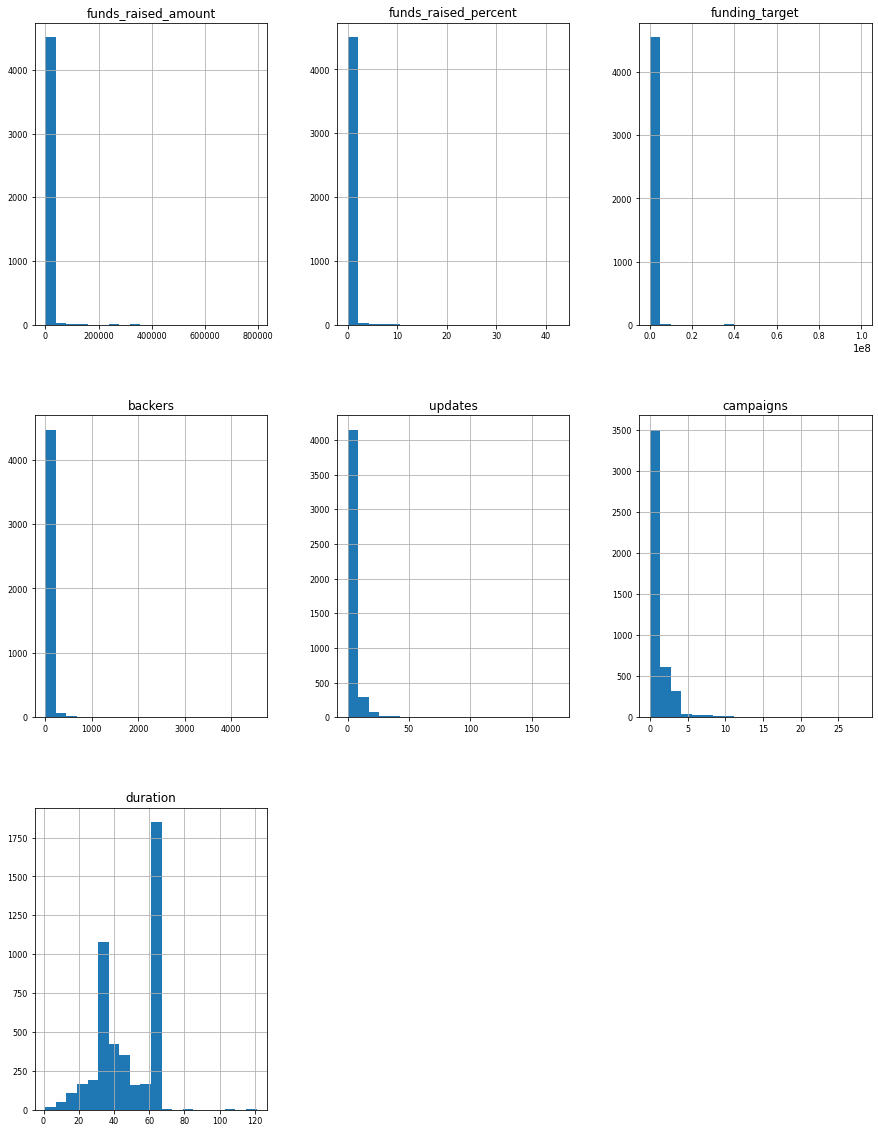

In [208]:
# Figure out the distribution of the numerical features
df_numerical.hist(figsize=(15, 20), bins=20,xlabelsize=8,\
                  ylabelsize=8)

plt.show()

Values of the numerical features seem to be skewed to the right. We need to take the logarithm of the features in order to make them more normaly distrubuted and decrease the skewness

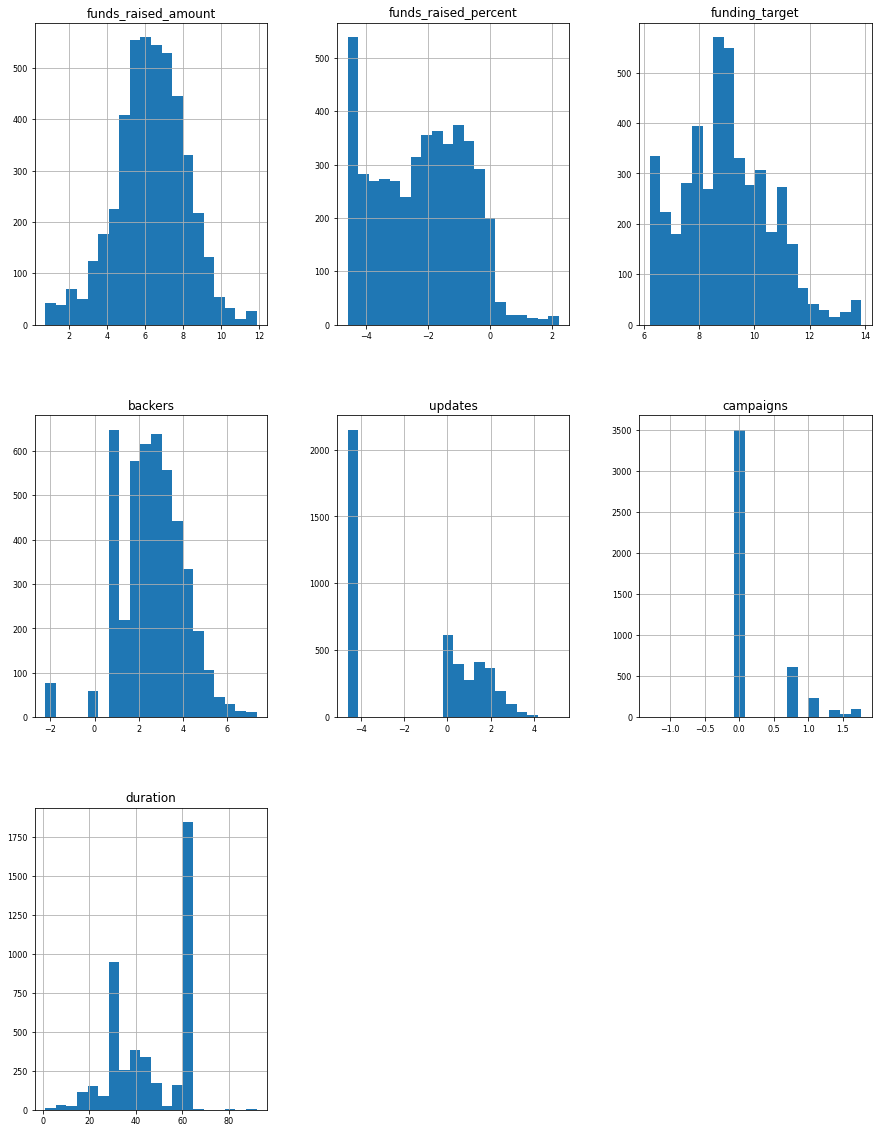

In [209]:
# Figure out the distribution of the numerical features
df_numerical_log.hist(figsize=(15, 20), bins=20,xlabelsize=8,\
                  ylabelsize=8)

plt.show()

<b>It is better now</b>

<span style="color:black; font-size:16px; font-family:sans-serif;"><a id="section-2-3-2"> </a><b> 2.3.2 Categorical Feature Exploration </b></span>

In [210]:
# Count of the successfel and failed campaigns in each country
df_categorical.groupby(['is_success','country']).agg({'is_success':'count'})

is_success
is_success country                   
0          Austria                 54
           Belgium                 63
           Bulgaria                69
           Croatia                 69
           Cyprus                  27
           Czech Republic          43
           Denmark                 68
           Estonia                 30
           Finland                 50
           France                 201
           Germany                354
           Greece                 146
           Hungary                 80
           Ireland                 84
           Italy                  332
           Latvia                  26
           Lithuania               39
           Luxembourg               1
           Malta                   14
           Netherlands            153
           Poland                  86
           Portugal               100
           Romania                 85
           Slovakia                34
           Slovenia                22
           Spain                  212
           Sweden                  91
           United Kingdom        1820
1          Austria                  5
           Belgium                  3
           Bulgaria                 1
           Croatia                  4
           Czech Republic           2
           Denmark                  2
           Estonia                  1
           Finland                  6
           France                   9
           Germany                 26
           Greece                   9
           Hungary                  5
           Ireland                  3
           Italy                    9
           Latvia                   1
           Lithuania                1
           Netherlands              7
           Poland                   6
           Portugal                 3
           Romania                  2
           Slovakia                 2
           Slovenia                 1
           Spain                   12
           Sweden                   6
           United Kingdom          88

In [211]:
# the rate of success for each country
df_categorical.groupby(['country'])['is_success'].mean()

country
Austria           0.084746
Belgium           0.045455
Bulgaria          0.014286
Croatia           0.054795
Cyprus            0.000000
Czech Republic    0.044444
Denmark           0.028571
Estonia           0.032258
Finland           0.107143
France            0.042857
Germany           0.068421
Greece            0.058065
Hungary           0.058824
Ireland           0.034483
Italy             0.026393
Latvia            0.037037
Lithuania         0.025000
Luxembourg        0.000000
Malta             0.000000
Netherlands       0.043750
Poland            0.065217
Portugal          0.029126
Romania           0.022989
Slovakia          0.055556
Slovenia          0.043478
Spain             0.053571
Sweden            0.061856
United Kingdom    0.046122
Name: is_success, dtype: float64

In [212]:
# Count of the successfel and failed campaigns in each country
df_categorical.groupby(['is_success','parent_category','category']).agg({'is_success':'count'})

is_success
is_success parent_category   category                           
0          community         Animal Rights                   154
                             Culture                         165
                             Environment                     183
                             Human Rights                    123
                             Local Businesses                129
                             Wellness                         91
           creative Works    Art                             197
                             Comics                          102
                             Dance & Theater                 202
                             Film                            374
                             Music                           194
                             Photography                     213
                             Podcasts, Blogs & Vlogs          55
                             Tabletop Games                   93
                             Video Games                     255
                             Web Series & TV Shows           109
                             Writing & Publishing            160
           tech & innovation Audio                            73
                             Camera Gear                      65
                             Education                       139
                             Energy & Green Tech              94
                             Fashion & Wearables             214
                             Food & Beverages                128
                             Health & Fitness                142
                             Home                            141
                             Phones & Accessories            168
                             Productivity                    115
                             Transportation                  122
                             Travel & Outdoors               153
1          community         Animal Rights                     4
                             Culture                          25
                             Human Rights                     22
                             Local Businesses                  2
                             Wellness                          7
           creative Works    Art                               2
                             Comics                            3
                             Film                             14
                             Music                             6
                             Photography                      26
                             Podcasts, Blogs & Vlogs          10
                             Tabletop Games                   43
                             Writing & Publishing              3
           tech & innovation Audio                            14
                             Camera Gear                      10
                             Energy & Green Tech               5
                             Productivity                      4
                             Transportation                   14

In [213]:
# the rate of success for each country
df_categorical.groupby(['category'])['is_success'].mean()

category
Animal Rights              0.025316
Art                        0.010050
Audio                      0.160920
Camera Gear                0.133333
Comics                     0.028571
Culture                    0.131579
Dance & Theater            0.000000
Education                  0.000000
Energy & Green Tech        0.050505
Environment                0.000000
Fashion & Wearables        0.000000
Film                       0.036082
Food & Beverages           0.000000
Health & Fitness           0.000000
Home                       0.000000
Human Rights               0.151724
Local Businesses           0.015267
Music                      0.030000
Phones & Accessories       0.000000
Photography                0.108787
Podcasts, Blogs & Vlogs    0.153846
Productivity               0.033613
Tabletop Games             0.316176
Transportation             0.102941
Travel & Outdoors          0.000000
Video Games                0.000000
Web Series & TV Shows      0.000000
Wellness           

In [214]:
df_categorical.groupby(['parent_category'])['is_success'].mean()

parent_category
community            0.066298
creative Works       0.051917
tech & innovation    0.029357
Name: is_success, dtype: float64

In [215]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4567 entries, 0 to 4566
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category         4567 non-null   object
 1   parent_category  4567 non-null   object
 2   country          4567 non-null   object
 3   goal_type        4567 non-null   object
 4   status           4567 non-null   object
 5   is_success       4567 non-null   int64 
 6   currency         4567 non-null   object
dtypes: int64(1), object(6)
memory usage: 285.4+ KB


In [216]:
df_categorical.groupby(['status'])['is_success'].mean()

status
female    0.041916
male      0.042563
team      0.058148
Name: is_success, dtype: float64

In [217]:
df_categorical.groupby(['goal_type'])['is_success'].mean()

goal_type
Fixed Goal       0.239852
Flexible Goal    0.034683
Name: is_success, dtype: float64

In [218]:
df_categorical['is_success'].value_counts(normalize=True)

0    0.953142
1    0.046858
Name: is_success, dtype: float64

<span style="color:black; font-size:18px; font-family:sans-serif;"><a id="section-2-4"> </a><b> 2.4 Feature Selection</b></span>

In [219]:
# Drop the features that will not be used for model building
df_new = df_copy.drop(['category', 'close_date', 'open_date','country',
              'currency', 'title','publisher', 'goal_type','status', 
              'parent_category', 'funds_raised_amount', 'funds_raised_percent',
              'backers','updates', 'campaigns', 'duration','funding_target'], axis=1)
df_merge = df_new.merge(df_numerical_log, on=df_new.index)

In [220]:
df_merge.drop(['key_0', 'funds_raised_amount', 'funds_raised_percent'],axis=1, inplace=True)

In [221]:
X = df_merge.drop('is_success', axis=1)
y = df_merge['is_success']

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [223]:
# Rescaling the numerical features to be standardized
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

X_train_std = pd.DataFrame(X_train_std, columns=X.columns)
X_test_std = pd.DataFrame(X_test_std, columns=X.columns)

In [224]:
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [225]:
# Instantiate the model for feature selection process
rf = RandomForestClassifier(n_estimators=500, random_state=42)

rf.fit(X_train_std, y_train.values.ravel())
                            
importances = rf.feature_importances_

# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::1]

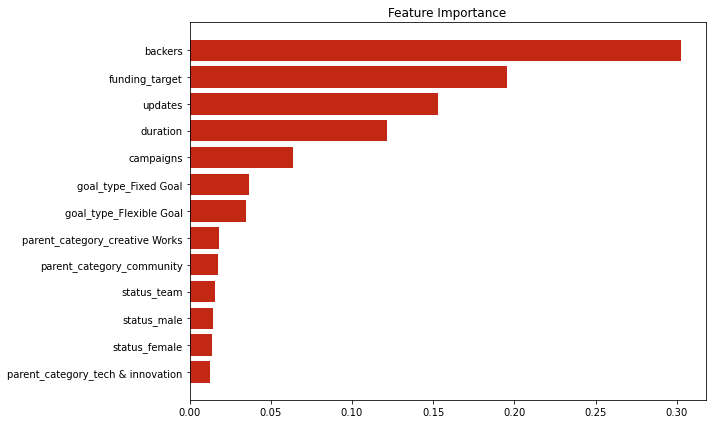

In [226]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
plt.barh(range(X_train_std.shape[1]), importances[sorted_indices], align='center', color = '#C22813')
plt.yticks(range(X_train_std.shape[1]), X_train_std.columns[sorted_indices])
plt.tight_layout()
plt.show()

In [227]:
rho = X_train_std.corr()
pval = X_train_std.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01] if x<=t]))
rho.round(2).astype(str) + p

,status_female,status_male,status_team,parent_category_community,parent_category_creative Works,parent_category_tech & innovation,goal_type_Fixed Goal,goal_type_Flexible Goal,funding_target,backers,updates,campaigns,duration
status_female,1.0**,-0.53**,-0.37**,0.1**,0.04*,-0.12**,-0.09**,0.09**,-0.11**,0.07**,-0.06**,0.0,-0.0
status_male,-0.53**,1.0**,-0.59**,-0.09**,-0.01,0.09**,0.02,-0.02,0.05**,-0.1**,0.02,-0.0,0.03
status_team,-0.37**,-0.59**,1.0**,0.01,-0.03,0.02,0.06**,-0.06**,0.06**,0.04*,0.03,-0.0,-0.03
parent_category_community,0.1**,-0.09**,0.01,1.0**,-0.45**,-0.37**,-0.07**,0.07**,0.02,0.02,-0.09**,0.02,0.01
parent_category_creative Works,0.04*,-0.01,-0.03,-0.45**,1.0**,-0.66**,-0.04*,0.04*,-0.31**,0.12**,-0.01,0.1**,-0.01
parent_category_tech & innovation,-0.12**,0.09**,0.02,-0.37**,-0.66**,1.0**,0.1**,-0.1**,0.3**,-0.14**,0.09**,-0.12**,0.0
goal_type_Fixed Goal,-0.09**,0.02,0.06**,-0.07**,-0.04*,0.1**,1.0**,-1.0**,0.08**,0.06**,0.01,0.01,-0.06**
goal_type_Flexible Goal,0.09**,-0.02,-0.06**,0.07**,0.04*,-0.1**,-1.0**,1.0**,-0.08**,-0.06**,-0.01,-0.01,0.06**
funding_target,-0.11**,0.05**,0.06**,0.02,-0.31**,0.3**,0.08**,-0.08**,1.0**,0.03,0.09**,-0.15**,0.17**
backers,0.07**,-0.1**,0.04*,0.02,0.12**,-0.14**,0.06**,-0.06**,0.03,1.0**,0.39**,0.06**,-0.08**


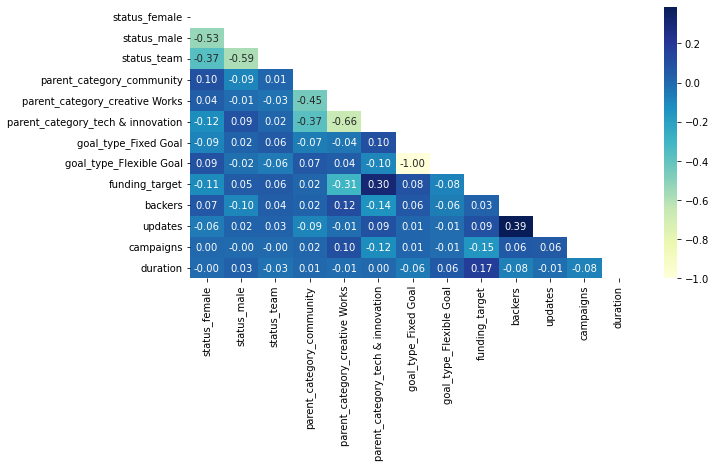

In [228]:
# Modifying the figure size
plt.figure(figsize=(10,5))
# Calculation of correlation among variables
corr_matrix = X_train_std.corr()
# Masking the upper triangle for the heatmap since it shows the same values of correlation
mask_upp = np.triu(np.ones_like(corr_matrix, dtype=bool))

# plotting correlation heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu",annot=True, fmt='.2f',\
            mask = mask_upp)
  
# displaying heatmap
plt.show()

In [229]:
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X_train_std[['status_female','status_team','parent_category_community',
                                  'parent_category_creative Works','goal_type_Fixed Goal','funding_target',
                                 'backers','updates','campaigns','duration']].columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X_train_std[['status_female','status_team','parent_category_community',
                                  'parent_category_creative Works','goal_type_Fixed Goal','funding_target',
                                 'backers','updates','campaigns','duration']].values, i) 
                          for i in range(len(X_train_std[['status_female','status_team','parent_category_community',
                                  'parent_category_creative Works','goal_type_Fixed Goal','funding_target',
                                 'backers','updates','campaigns','duration']].columns))] 
vif_data

,feature,VIF
0,status_female,1.207354
1,status_team,1.170626
2,parent_category_community,1.358011
3,parent_category_creative Works,1.493133
4,goal_type_Fixed Goal,1.032432
5,funding_target,1.210129
6,backers,1.258353
7,updates,1.227341
8,campaigns,1.041611
9,duration,1.051174


In [230]:
X_train_std_sel = X_train_std.drop(['status_male','parent_category_tech & innovation','goal_type_Flexible Goal'],axis=1)
X_test_std_sel = X_test_std.drop(['status_male','parent_category_tech & innovation','goal_type_Flexible Goal'],axis=1)

<span style="color:#FFBF50; font-size:25px; font-family:sans-serif;"><a id="section-3"> </a> 3. Model Building and Evaluation </span>

<span style="color:black; font-size:18px; font-family:sans-serif;"><a id="section-3-1"> </a><b> 3.1 Logistic Regression</b></span>

In [231]:
X_complete = pd.concat([X_train_std_sel, X_test_std_sel]).reset_index(drop=True)
y_complete = pd.concat([y_train, y_test]).reset_index(drop=True)

In [232]:
X_complete['intercept'] = 1.0
to_include = ['intercept','status_female', 'status_team', 'parent_category_community','parent_category_creative Works',
              'goal_type_Fixed Goal','funding_target','backers', 'updates', 'campaigns', 'duration']


logit_mod = sm.Logit(y_complete,X_complete[to_include])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.089426
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             is_success   No. Observations:                 4567
Model:                          Logit   Df Residuals:                     4556
Method:                           MLE   Df Model:                           10
Date:                Sun, 31 Dec 2023   Pseudo R-squ.:                  0.5272
Time:                        11:22:29   Log-Likelihood:                -408.41
converged:                       True   LL-Null:                       -863.88
Covariance Type:            nonrobust   LLR p-value:                2.809e-189
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
intercept                         -6.7577      0.319    -21.187      0.000      -7.383      -6.133
status_female                      0.0022      0.103      0.021      0.983      -0.199       0.204
status_team                       -0.0103      0.103     -0.100      0.920      -0.211       0.191
parent_category_community          0.1749      0.107      1.628      0.103      -0.036       0.386
parent_category_creative Works    -0.4346      0.124     -3.506      0.000      -0.677      -0.192
goal_type_Fixed Goal               0.7107      0.074      9.669      0.000       0.567       0.855
funding_target                    -2.5775      0.191    -13.480      0.000      -2.952      -2.203
backers                            3.0138      0.203     14.822      0.000       2.615       3.412
updates                            0.4698      0.114      4.132      0.000       0.247       0.693
campaigns                          0.1124      0.071      1.574      0.116      -0.028       0.252
duration                          -0.1992      0.091     -2.189      0.029      -0.378      -0.021
==================================================================================================

Possibly complete quasi-separation: A fraction 0.25 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [233]:
log_clf = LogisticRegression(random_state=42)
log_clf.fit(X_train_std_sel, y_train)

LogisticRegression(random_state=42)

In [234]:
y_pred = log_clf.predict(X_test_std_sel)

In [235]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1307
           1       0.93      0.44      0.60        64

    accuracy                           0.97      1371
   macro avg       0.95      0.72      0.79      1371
weighted avg       0.97      0.97      0.97      1371



In [236]:
#define cross-validation method to use
cv = KFold(n_splits=5, random_state=42, shuffle=True)

scorings = ['accuracy','precision_macro','recall_macro', 'f1_macro']
#use k-fold CV to evaluate model
for score in scorings:
    scores = cross_val_score(log_clf, X_complete, y_complete, cv=cv, scoring=score,n_jobs=-1)
    print(f'{score}:',round(np.mean(scores),2))

accuracy: 0.97
precision_macro: 0.91
recall_macro: 0.72
f1_macro: 0.78


In [237]:
# OR

#define cross-validation method to use
# accuracy_results_log = []
# precision_results_log = []
# recall_results_log = []
# f1_results_log = []
# #use k-fold CV to evaluate model
# for train, test in cv.split(X_complete, y_complete):
#     knn_clf.fit(X_complete.iloc[train], y_complete.iloc[train])
#     y_pred = knn_clf.predict(X_complete.iloc[test])
    
#     accuracy_results_log.append(accuracy_score(y_complete[test], y_pred))
#     precision_results_log.append(precision_score(y_complete[test], y_pred, average='macro'))
#     recall_results_log.append(recall_score(y_complete[test], y_pred, average='macro'))
#     f1_results_log.append(f1_score(y_complete[test], y_pred, average='macro'))

<span style="color:black; font-size:18px; font-family:sans-serif;"><a id="section-3-1-1"> </a><b> 3.1.1 Logistic Regression Tuning</b></span>

In [238]:
params= {"C" :[0.001, 0.01, 0.1, 0.5, 1, 10, 25]}


grid_log = GridSearchCV(log_clf, params, scoring=make_scorer(f1_score), n_jobs=-1)
# fitting the model for grid search 
grid_log.fit(X_train_std_sel, y_train) 

# print best parameter after tuning 
print(grid_log.best_params_) 
grid_predictions = grid_log.predict(X_test_std_sel)
   
# print classification report 
print(classification_report(y_test, grid_predictions))

{'C': 10}
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1307
           1       0.93      0.44      0.60        64

    accuracy                           0.97      1371
   macro avg       0.95      0.72      0.79      1371
weighted avg       0.97      0.97      0.97      1371



In [239]:
#use k-fold CV to evaluate model
for score in scorings:
    scores = cross_val_score(grid_log, X_complete, y_complete, cv=cv, scoring=score,n_jobs=-1)
    print(f'{score}:',round(np.mean(scores),2))


accuracy: 0.97
precision_macro: 0.9
recall_macro: 0.72
f1_macro: 0.78


<span style="color:black; font-size:18px; font-family:sans-serif;"><a id="section-3-2"> </a><b> 3.2 KNN</b></span>

In [148]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_std_sel, y_train)
y_pred = knn_clf.predict(X_test_std_sel)

In [149]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1307
           1       0.76      0.25      0.38        64

    accuracy                           0.96      1371
   macro avg       0.86      0.62      0.68      1371
weighted avg       0.95      0.96      0.95      1371



In [250]:
#use k-fold CV to evaluate model
for score in scorings:
    scores = cross_val_score(knn_clf, X_complete, y_complete, cv=cv, scoring=score,n_jobs=-1)
    print(f'{score}:',round(np.mean(scores),2))

accuracy: 0.96
precision_macro: 0.87
recall_macro: 0.64
f1_macro: 0.7


<span style="color:black; font-size:18px; font-family:sans-serif;"><a id="section-3-2-1"> </a><b> 3.2.1 KNN Tuning</b></span>

In [243]:
# Choosing the best k value for training data
k_range = range(1, 20)
scores_train = {}
scores_list_train = []
for k in k_range:
    knn_clf = KNeighborsClassifier(n_neighbors = k)
    knn_clf.fit(X_train_std_sel, y_train)
    y_pred_train = knn_clf.predict(X_train_std_sel)
    scores_train[k] = f1_score(y_train, y_pred_train)
    scores_list_train.append(f1_score(y_train, y_pred_train))

# Choosing the best k value for testing data
k_range = range(1, 20)
scores_test = {}
scores_list_test = []
for k in k_range:
    knn_clf = KNeighborsClassifier(n_neighbors = k)
    knn_clf.fit(X_train_std_sel, y_train)
    y_pred = knn_clf.predict(X_test_std_sel)
    scores_test[k] = f1_score(y_test, y_pred)
    scores_list_test.append(f1_score(y_test, y_pred))

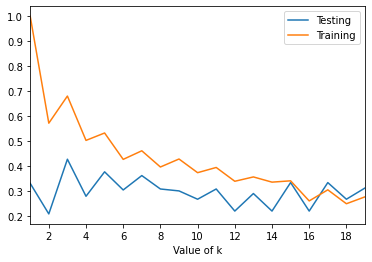

In [244]:
# plot the relationship between k and the testing accuracy
plt.plot(k_range, scores_list_test, label = "Testing")
plt.plot(k_range, scores_list_train, label = "Training")
plt.xlabel("Value of k")
plt.xlim(1, 19)
plt.legend()
plt.show()

In [251]:
knn_clf_tuned = KNeighborsClassifier(n_neighbors=3)
knn_clf_tuned.fit(X_train_std_sel, y_train)
y_pred = knn_clf_tuned.predict(X_test_std_sel)

In [252]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1307
           1       0.76      0.30      0.43        64

    accuracy                           0.96      1371
   macro avg       0.86      0.65      0.70      1371
weighted avg       0.96      0.96      0.95      1371



In [253]:
#use k-fold CV to evaluate model
for score in scorings:
    scores = cross_val_score(knn_clf_tuned, X_complete, y_complete, cv=cv, scoring=score,n_jobs=-1)
    print(f'{score}:',round(np.mean(scores),2))

accuracy: 0.96
precision_macro: 0.83
recall_macro: 0.66
f1_macro: 0.71


<span style="color:black; font-size:18px; font-family:sans-serif;"><a id="section-3-3"> </a><b> 3.3 Decision Trees</b></span>

In [254]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_std_sel, y_train)

DecisionTreeClassifier(random_state=42)

In [255]:
y_pred = dt_clf.predict(X_test_std_sel)

In [256]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1307
           1       0.49      0.38      0.42        64

    accuracy                           0.95      1371
   macro avg       0.73      0.68      0.70      1371
weighted avg       0.95      0.95      0.95      1371



In [257]:
#use k-fold CV to evaluate model
for score in scorings:
    scores = cross_val_score(dt_clf, X_complete, y_complete, cv=cv, scoring=score,n_jobs=-1)
    print(f'{score}:',round(np.mean(scores),2))

accuracy: 0.95
precision_macro: 0.73
recall_macro: 0.72
f1_macro: 0.72


<span style="color:black; font-size:18px; font-family:sans-serif;"><a id="section-3-3-1"> </a><b> 3.3.1 Decision Trees Tuning</b></span>

In [258]:
params= {"max_depth" :range(1,12,1),
        "min_samples_split":range(10, 100, 10)}


grid_dt = GridSearchCV(dt_clf, params, scoring=make_scorer(f1_score), n_jobs=-1)
# fitting the model for grid search 
grid_dt.fit(X_train_std_sel, y_train) 

# print best parameter after tuning 
print(grid_dt.best_params_) 
grid_predictions = grid_dt.predict(X_test_std_sel)
   
# print classification report 
print(classification_report(y_test, grid_predictions))

{'max_depth': 7, 'min_samples_split': 20}
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1307
           1       0.77      0.36      0.49        64

    accuracy                           0.96      1371
   macro avg       0.87      0.68      0.74      1371
weighted avg       0.96      0.96      0.96      1371



In [259]:
#use k-fold CV to evaluate model
for score in scorings:
    scores = cross_val_score(grid_dt, X_complete, y_complete, cv=cv, scoring=score, n_jobs=-1)
    print(f'{score}:',round(np.mean(scores),2))

accuracy: 0.96
precision_macro: 0.77
recall_macro: 0.7
f1_macro: 0.72


<span style="color:black; font-size:18px; font-family:sans-serif;"><a id="section-3-4"> </a><b> 3.4 Bagging</b></span>

In [260]:
bag_clf = BaggingClassifier(random_state=42)
bag_clf.fit(X_train_std_sel, y_train)

BaggingClassifier(random_state=42)

In [261]:
y_pred = bag_clf.predict(X_test_std_sel)

In [262]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1307
           1       0.78      0.33      0.46        64

    accuracy                           0.96      1371
   macro avg       0.87      0.66      0.72      1371
weighted avg       0.96      0.96      0.96      1371



In [263]:
#use k-fold CV to evaluate model
for score in scorings:
    scores = cross_val_score(bag_clf, X_complete, y_complete, cv=cv, scoring=score,n_jobs=-1)
    print(f'{score}:',round(np.mean(scores),2))

accuracy: 0.96
precision_macro: 0.84
recall_macro: 0.72
f1_macro: 0.76


<span style="color:black; font-size:18px; font-family:sans-serif;"><a id="section-3-4-1"> </a><b> 3.4.1 Bagging Tuning</b></span>

In [264]:
params= {"n_estimators" :[10, 15, 20, 30, 40, 60],
        "max_features":[2, 4, 6, 8, 10]}


grid_bag = GridSearchCV(bag_clf, params, scoring=make_scorer(f1_score), n_jobs=-1)
# fitting the model for grid search 
grid_bag.fit(X_train_std_sel, y_train) 

# print best parameter after tuning 
print(grid_bag.best_params_) 
grid_predictions = grid_bag.predict(X_test_std_sel)
   
# print classification report 
print(classification_report(y_test, grid_predictions))

{'max_features': 10, 'n_estimators': 15}
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1307
           1       0.82      0.44      0.57        64

    accuracy                           0.97      1371
   macro avg       0.90      0.72      0.78      1371
weighted avg       0.97      0.97      0.96      1371



In [265]:
#use k-fold CV to evaluate model
for score in scorings:
    scores = cross_val_score(grid_bag, X_complete, y_complete, cv=cv, scoring=score,n_jobs=-1)
    print(f'{score}:',round(np.mean(scores),2))

accuracy: 0.96
precision_macro: 0.84
recall_macro: 0.72
f1_macro: 0.76


<span style="color:black; font-size:18px; font-family:sans-serif;"><a id="section-3-5"> </a><b> 3.5 Boosting</b></span>

In [266]:
boost_clf = GradientBoostingClassifier(random_state=42)
boost_clf.fit(X_train_std_sel, y_train)

GradientBoostingClassifier(random_state=42)

In [267]:
y_pred = boost_clf.predict(X_test_std_sel)

In [268]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1307
           1       0.80      0.38      0.51        64

    accuracy                           0.97      1371
   macro avg       0.89      0.69      0.75      1371
weighted avg       0.96      0.97      0.96      1371



In [269]:
#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True)

scorings = ['accuracy','precision_macro','recall_macro', 'f1_macro']
#use k-fold CV to evaluate model
for score in scorings:
    scores = cross_val_score(boost_clf, X_complete, y_complete, cv=cv, scoring=score,n_jobs=-1)
    print(f'{score}:',round(np.mean(scores),2))

accuracy: 0.97
precision_macro: 0.86
recall_macro: 0.73
f1_macro: 0.78


<span style="color:black; font-size:18px; font-family:sans-serif;"><a id="section-3-5-1"> </a><b> 3.5.1 Boosting Tuning</b></span>

In [270]:
params= {"n_estimators" :range(10, 70, 10),
        "learning_rate":np.arange(0.05, 0.4, 0.05),
        "max_depth": range(1,7,1)}


grid_boost = GridSearchCV(boost_clf, params, scoring="f1_macro", n_jobs=-1)
# fitting the model for grid search 
grid_boost.fit(X_train_std_sel, y_train) 

# print best parameter after tuning 
print(grid_boost.best_params_) 
grid_predictions = grid_boost.predict(X_test_std_sel)
   
# print classification report 
print(classification_report(y_test, grid_predictions))

{'learning_rate': 0.25, 'max_depth': 4, 'n_estimators': 40}
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1307
           1       0.87      0.42      0.57        64

    accuracy                           0.97      1371
   macro avg       0.92      0.71      0.78      1371
weighted avg       0.97      0.97      0.97      1371



In [271]:
#use k-fold CV to evaluate model
for score in scorings:
    scores = cross_val_score(grid_boost, X_complete, y_complete, cv=cv, scoring=score,n_jobs=-1)
    print(f'{score}:',round(np.mean(scores),2))

accuracy: 0.97
precision_macro: 0.84
recall_macro: 0.72
f1_macro: 0.76


#### Champion Model is: Logisitc Regression

<span style="color:#FFBF50; font-size:25px; font-family:sans-serif;"><a id="section-4"> </a> 4. Model Deployment </span>

In [923]:
log_clf_champ = LogisticRegression(C=10, random_state=42)
log_clf_champ.fit(X_train_std_sel, y_train)

LogisticRegression(C=25, random_state=42)

In [924]:
# Building deploy the model
def predict_campaign_success(config, model):
    
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config
    
    y_pred = model.predict(df)
    
    if y_pred == 1:
        return 'Success'
    elif y_pred == 0:
        return 'Failed'

In [936]:
config = {
    'status_female': [0],
    'status_team': [1],
    'parent_category_community': [0],
    'parent_category_creative Works':[1],
    'goal_type_Fixed Goal':[1],
    'funding_target':[5000],
    'backers':[3980],
    'updates':[20],
    'campaigns':[10],
    'duration':[35]
}

predict_campaign_success(config, log_clf_champ)

'Success'

In [937]:
# Save to file in the current working directory
pkl_filename = "model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(log_clf_champ, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [938]:
##loading the model from the saved file
pkl_filename = "model.pkl"
with open(pkl_filename, 'rb') as f_in:
    model = pickle.load(f_in)

predictValue = predict_campaign_success(config, model)
predictValue

'Success'

In [241]:
# Create flask app
template_dir = os.path.abspath("C:/Users/mohammed hani/Desktop/Data_for_final_thesis")
flask_app = Flask(__name__, template_folder=template_dir)
model_path = os.path.join(template_dir, "model.pkl")
model = pickle.load(open(model_path, "rb"))

@flask_app.route("/")
def Home():
    return render_template("index.html")

@flask_app.route("/predict", methods=["POST"])
def predict():
    float_features = [float(x) for x in request.form.values()]
    features = [np.array(float_features)]
    prediction = model.predict(features)
    if prediction == 1:
        return render_template("index.html", prediction_text="The predicted campaign status is Successful")
    elif prediction == 0:
        return render_template("index.html", prediction_text="The predicted campaign status is Failed".format(prediction))


if __name__ == "__main__":
    flask_app.run(debug=True, use_reloader=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [31/Dec/2023 11:53:38] "GET / HTTP/1.1" 200 -
C:\Users\mohammed hani\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [31/Dec/2023 11:54:06] "POST /predict HTTP/1.1" 200 -
C:\Users\mohammed hani\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [31/Dec/2023 11:54:32] "POST /predict HTTP/1.1" 200 -
